In [37]:
# Importando o Dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/datasets/Hotel Reservations.csv")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:

del df["Booking_ID"]

In [39]:

def arrival_year(df):
  # Criar o dicionário de codificação
  mapping = {"2017": 0, "2018": 1}
  # Aplicar a codificação
  df["arrival_year"] = df["arrival_year"].map(mapping)

def classifica_valores(valor):
    return np.where(valor <= 85, 0,
                    np.where(np.logical_and(valor > 85, valor <= 115), 1, 2))



In [4]:
arrival_year(df)

In [40]:
colunas_dummies = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status','arrival_year','arrival_month',"arrival_date"]
df = pd.get_dummies(df, prefix = colunas_dummies, columns = colunas_dummies)

In [41]:
#Criação da coluna "label_avg_price_per_room" e atribuição da mesma a codificação da coluna "avg_price_per_room"
df["label_avg_price_per_room"]=df["avg_price_per_room"].apply(classifica_valores)

In [42]:
from sklearn.preprocessing import minmax_scale
df['lead_time'] = minmax_scale(df['lead_time'])
df['no_of_previous_bookings_not_canceled'] = minmax_scale(df['no_of_previous_bookings_not_canceled'])

In [43]:
#Apagando a coluna "avg_price_per_room"
del df["avg_price_per_room"]

In [44]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,...,arrival_date_23,arrival_date_24,arrival_date_25,arrival_date_26,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_30,arrival_date_31,label_avg_price_per_room
0,2,0,1,2,0,0.505643,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,3,0,0.011287,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,0.002257,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,0,2,0,0.476298,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,0.108352,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0.191874,0,0,0.0,1,...,0,0,0,0,0,0,0,0,0,2
36271,2,0,1,3,0,0.514673,0,0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,0.334086,0,0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,0.142212,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


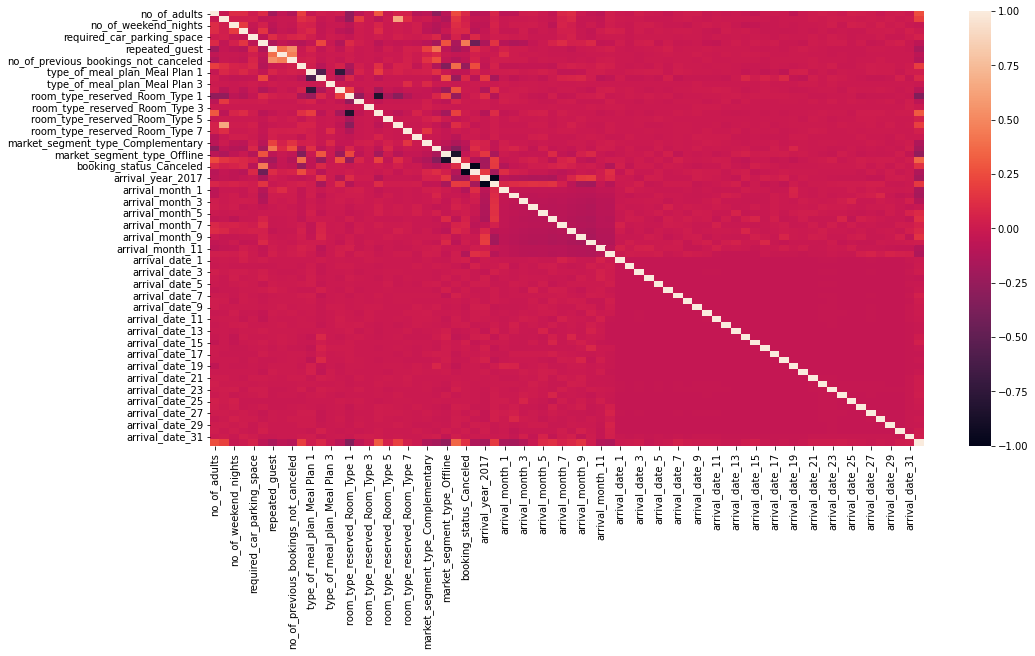

In [29]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=False);